<a href="https://colab.research.google.com/github/jy6zheng/TwitterDisasterTweets/blob/master/TwitterTabularTextMetadata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.text import *
from fastai.tabular import *
from fastai.imports import *
from wordcloud import STOPWORDS
import string

In [5]:
path = Path(base_dir + '/data/twitter')
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/content/gdrive/My Drive/fastai-v3/data/twitter')

In [6]:
data = pd.read_csv(path/'train.csv')
data.head(2)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1


In [7]:
filenames = ['train.csv', 'test.csv']
combined_data = pd.concat([pd.read_csv(path/f) for f in filenames ])
combined_data.fillna('None', inplace = True)
combined_data

,id,keyword,location,text,target
0,1,None,None,Our Deeds are the Reason of this #earthquake M...,1
1,4,None,None,Forest fire near La Ronge Sask. Canada,1
2,5,None,None,All residents asked to 'shelter in place' are ...,1
3,6,None,None,"13,000 people receive #wildfires evacuation or...",1
4,7,None,None,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
3258,10861,None,None,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,None
3259,10865,None,None,Storm in RI worse than last hurricane. My city...,None
3260,10868,None,None,Green Line derailment in Chicago http://t.co/U...,None
3261,10874,None,None,MEG issues Hazardous Weather Outlook (HWO) htt...,None


In [0]:
bs=48

In [9]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:657: SourceChangeWarning: source code of class 'torch.nn.modules.loss.CrossEntropyLoss' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [10]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [11]:
learn.load_encoder('fine_tuned_enc')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (9789 items)
x: LMTextList
xxbos xxmaj our xxmaj xxunk are the xxmaj reason of this # earthquake xxmaj may xxup allah xxmaj forgive us all,xxbos xxmaj forest fire near xxmaj la xxmaj xxunk xxmaj xxunk . xxmaj canada,xxbos xxunk people receive # wildfires evacuation orders in xxmaj california,xxbos xxmaj just got sent this photo from xxmaj xxunk # xxmaj alaska as smoke from # wildfires xxunk into a school,xxbos # rockyfire xxmaj update = > xxmaj california xxmaj hwy . 20 closed in both xxunk due to xxmaj lake xxmaj county fire - # xxunk # wildfires
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (1087 items)
x: LMTextList
xxbos xxunk thank you . ? ? now i do n't have a city xxunk curfew . xxrep 4 ?,xxbos only weapon i m scared off is xxunk,xxbos xxmaj still xxunk terrorism https : / / t.co / xxunk,xxbos * * xxmaj let - xxmaj me - xxmaj be - xxmaj your - xxmaj hot - xxmaj blazing - xxmaj fantasy * * 
  # xxunk # xxunk # xxup xxunk ht

In [12]:
df_test = pd.read_csv(path/'test.csv')
df_test.head(2)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."


In [13]:
df_train = pd.read_csv(path/'train.csv')
df_train.head(2)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1


In [0]:
df_train['word_count'] = df_train['text'].apply(lambda x: len(str(x).split()))
df_test['word_count'] = df_test['text'].apply(lambda x: len(str(x).split()))

In [15]:
df_train['unique_word_count'] = df_train['text'].apply(lambda x: len(set(str(x).split())))
df_test['unique_word_count'] = df_test['text'].apply(lambda x: len(set(str(x).split())))
df_test.head(2)

,id,keyword,location,text,word_count,unique_word_count
0,0,NaN,NaN,Just happened a terrible car crash,6,6
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",9,9


In [16]:
df_train['stop_word_count'] = df_train['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
df_test['stop_word_count'] = df_test['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
df_test.head(2)

,id,keyword,location,text,word_count,unique_word_count,stop_word_count
0,0,NaN,NaN,Just happened a terrible car crash,6,6,2
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",9,9,2


In [0]:
df_train['mean_word_length'] = df_train['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df_test['mean_word_length'] = df_test['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [0]:
df_train['char_count'] = df_train['text'].apply(lambda x: len(str(x)))
df_test['char_count'] = df_test['text'].apply(lambda x: len(str(x)))

In [0]:
df_train['punctuation_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df_test['punctuation_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

In [20]:
df_train.head(2)

,id,keyword,location,text,target,word_count,unique_word_count,stop_word_count,mean_word_length,char_count,punctuation_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,13,6,4.384615,69,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,7,0,4.571429,38,1


In [26]:
df_train = df_train.drop(['keyword', 'location'], axis=1)
df_test = df_test.drop(['keyword', 'location'], axis=1)
df_train.head(2)

,id,text,target,word_count,unique_word_count,stop_word_count,mean_word_length,char_count,punctuation_count
0,1,Our Deeds are the Reason of this #earthquake M...,1,13,13,6,4.384615,69,1
1,4,Forest fire near La Ronge Sask. Canada,1,7,7,0,4.571429,38,1


In [0]:
cont_names = ['word_count', 'unique_word_count', 'stop_word_count', 'mean_word_length', 'char_count', 'punctuation_count']
cat_names = []

In [0]:
dep_var = 'target'
procs = [FillMissing, Categorify, Normalize]
txt_cols=['text']
bs = 64 

In [0]:
start = int(len(df_train)*.7)
end = int((len(df_train)*0.3) + start)

In [0]:
val_idxs = list(range(start, end))

In [0]:
def get_tab_databunch(df,bs=bs,val_idxs=val_idxs, path = path):
    return (TabularList.from_df(df, cat_names, cont_names, procs=procs, path=path)
                            .split_by_idx(val_idxs)
                            .label_from_df(cols=dep_var)
                            .databunch(bs=bs))

In [0]:
def get_text_databunch(df,bs=bs,val_idxs=val_idxs, path = path):
    # load fine-tuned vocab
    data_lm =load_data(path, 'data_lm.pkl', bs=bs)
    return (TextList.from_df(df, cols = txt_cols[0], vocab=data_lm.vocab, path=path)
                            .split_by_idx(val_idxs)
                            .label_from_df(cols=dep_var)
                            .databunch(bs=bs))

In [0]:
def get_tabular_learner(data, params):
    return tabular_learner(data,metrics=accuracy,**params)

In [0]:
def get_text_learner(data, params):
    learn = text_classifier_learner(data,AWD_LSTM,metrics=accuracy,**params)
    learn.path=path
    learn.load_encoder('fine_tuned_enc')
    learn.path=path
    return learn

In [94]:
tab_db = get_tab_databunch(df_train[cat_names + cont_names+ [dep_var]])
text_db = get_text_databunch(df_train[txt_cols +[dep_var]])

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:657: SourceChangeWarning: source code of class 'torch.nn.modules.loss.CrossEntropyLoss' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [0]:
class ConcatDataset(Dataset):
    def __init__(self, x1, x2, y): self.x1, self.x2, self.y = x1, x2, y
    def __len__(self): return len(self.y)
    def __getitem__(self, i): return (self.x1[i], self.x2[i]), self.y[i]
def tabtext_collate(batch):
    x, y = list(zip(*batch))
    # x1 is (cat,cont), x2 is numericalized ids for text
    x1, x2 = list(zip(*x))
    x1 = to_data(x1)
    x1 = list(zip(*x1))
    x1 = torch.stack(x1[0]), torch.stack(x1[1])
    x2, y = pad_collate(list(zip(x2, y)), pad_idx=1, pad_first=True)
    return (x1, x2), y

In [0]:
train_ds = ConcatDataset(tab_db.train_ds.x, text_db.train_ds.x, tab_db.train_ds.y)
valid_ds = ConcatDataset(tab_db.valid_ds.x, text_db.valid_ds.x, tab_db.valid_ds.y)

In [0]:
train_sampler = SortishSampler(text_db.train_ds.x, key=lambda t: len(text_db.train_ds[t][0].data), bs=bs//2)
valid_sampler = SortSampler(text_db.valid_ds.x, key=lambda t: len(text_db.valid_ds[t][0].data))

In [0]:
train_dl = DataLoader(train_ds, bs//2, sampler=train_sampler)
valid_dl = DataLoader(valid_ds, bs, sampler=valid_sampler)
data = DataBunch(train_dl, valid_dl, device=defaults.device, collate_fn=tabtext_collate, path=path)

In [111]:
data

DataBunch;

Train: <__main__.ConcatDataset object at 0x7f06fe1e4e10>;

Valid: <__main__.ConcatDataset object at 0x7f06fe1e4e48>;

Test: None

In [0]:
def get_data(bs=bs,path=MODEL_TEXT_TAB_PATH):
    
    # get databunches using fast.ai's implementation
    tab_db = get_tab_databunch(df_all[cat_names + cont_names+ [dep_var]])
    text_db = get_text_databunch(df_all[txt_cols +[dep_var]])
    
    # extend the databunches to work with our Concat Model
    train_ds = ConcatDataset(tab_db.train_ds.x, text_db.train_ds.x, tab_db.train_ds.y)
    valid_ds = ConcatDataset(tab_db.valid_ds.x, text_db.valid_ds.x, tab_db.valid_ds.y)
    
    # add sample startegies for both training and validation set
    train_sampler = SortishSampler(text_db.train_ds.x, key=lambda t: len(text_db.train_ds[t][0].data), bs=bs//2)
    valid_sampler = SortSampler(text_db.valid_ds.x, key=lambda t: len(text_db.valid_ds[t][0].data))
    
    # create DataLoaders
    train_dl = DataLoader(train_ds, bs//2, sampler=train_sampler)
    valid_dl = DataLoader(valid_ds, bs, sampler=valid_sampler)
    
    # create databunch to work with out Concat Model
    data = DataBunch(train_dl, valid_dl, device=defaults.device, collate_fn=tabtext_collate, path=path)

    return data,tab_db,text_db

In [0]:
class ConcatModel(nn.Module):
    def __init__(self, mod_tab, mod_nlp, layers, drops):
        super().__init__()
        self.mod_tab = mod_tab
        self.mod_nlp = mod_nlp
        lst_layers = []
        activs = [nn.ReLU(inplace=True), ] * (len(layers)-2) + [None]
        for n_in, n_out, p, actn in zip(layers[:-1], layers[1:], drops, activs):
            lst_layers += bn_drop_lin(n_in, n_out, p=p, actn=actn)
        self.layers = nn.Sequential(*lst_layers)

    def forward(self, *x):
        x_tab = self.mod_tab(*x[0])
        x_nlp = self.mod_nlp(x[1])[0]
        x = torch.cat([x_tab, x_nlp], dim=1)
        return self.layers(x)

In [0]:
def get_concat_learner(data, tab_db, text_db):
    
    # output size of the last layer of the tabular module
    tab_out_size = 100
    # output size of the last layer of the text module (ULMFiT)
    text_out_size = 300
    
    params = {
        'layers': [tab_out_size], # output size of the last layer of the tabular module
        'ps': [0.], # dropout before the last layer of the tabular module
        'emb_drop': 0., # embedding dropout for categorical features
        'use_bn': True, # use batchnorm
    }
    
    # instantiate the tabular learner
    tab_learner = get_tabular_learner(tab_db, params)
    # cut off layers so we can put the Concat head on top
    tab_learner.model.layers = tab_learner.model.layers[:-2]

    params = {
        'lin_ftrs': [text_out_size],  # output size of the last layer of the text module (ULMFiT)
        'bptt': 80, # backpropagation through time (sequence length)
        'max_len': 20*80, # last max_len activations to be considered (see https://docs.fast.ai/text.learner.html)
        'drop_mult': 1. # dropout rate
    }
    
    # instantiate the text learner
    text_learner = get_text_learner(text_db, params)
    # cut off layers so we can put the Concat head on top
    text_learner.model[-1].layers = text_learner.model[-1].layers[:-3]
    
    # size of fully connected layers in Concat Head
    lin_layers = [tab_out_size + text_out_size, 200, 100]
    # dropout rate for fully connected layers in Concat Head
    ps = [0.3, 0.2, 0.1]
    model = ConcatModel(tab_learner.model, text_learner.model, lin_layers, ps)
    
    # Use Mean Squared Error here if you want to use this for a regression task
    loss_func = CrossEntropyFlat()
   
    learn = Learner(data, model, loss_func=loss_func, metrics=accuracy)
    
    return learn

In [0]:
learner = get_concat_learner(data,tab_db,text_db)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


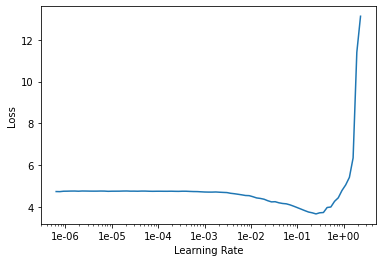

In [170]:
learner.lr_find()
learner.recorder.plot(skip_end=1)

In [171]:
learner.fit_one_cycle(2, 1e-1, moms=(0.8,0.7)) 

epoch,train_loss,valid_loss,accuracy,time
0,0.881800,0.543563,0.737626,00:03
1,0.619916,1.364763,0.771353,00:03


In [0]:
learn.save('first')